## Branching Model

In [10]:
branch_python="""
y = [-5,-2.4, 35]
mean = sample(normal(1,1))
if mean > 2:
    observe(normal(3,8),y[2])
elif mean < 1:
    observe(gamma(mean,3),y[0])
else:
    observe(beta(3,3),y[1])
observe(uniform(2,5),mean)
"""


In [11]:
compiled_python = compile_model(branch_python, language='python')

## The dependency graph

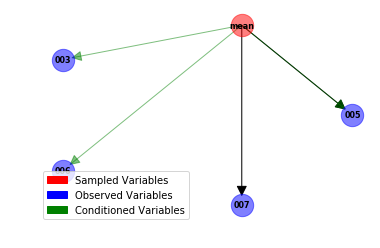

In [12]:
vertices = compiled_python.vertices
create_network_graph(vertices=vertices)
display_graph(vertices=vertices);

## The Compiled Graph

In [15]:
print(compiled_python)

#Vertices: 5, #Arcs: 2
Vertices V:
Vertex x30001 [Sample]
  Name:           x30001
  Ancestors:      
  Cond-Ancs.:     
  Dist-Args:      {'loc': '1', 'scale': '1'}
  Dist-Code:      dist.Normal(1, 1)
  Dist-Name:      Normal
  Dist-Type:      DistributionType.CONTINUOUS
  Sample-Size:    1
  Orig. Name:     mean
Vertex y30003 [Observe]
  Name:           y30003
  Ancestors:      
  Conditions:     cond_30002=True
  Cond-Ancs.:     x30001
  Cond-Nodes:     cond_30002
  Dist-Args:      {'loc': '3', 'scale': '8'}
  Dist-Code:      dist.Normal(3, 8)
  Dist-Name:      Normal
  Dist-Type:      DistributionType.CONTINUOUS
  Sample-Size:    1
  Observation:    35
Vertex y30005 [Observe]
  Name:           y30005
  Ancestors:      x30001
  Conditions:     cond_30004=True, cond_30002=False
  Cond-Ancs.:     x30001
  Cond-Nodes:     cond_30004, cond_30002
  Dist-Args:      {'alpha': "state['x30001']", 'beta': '3'}
  Dist-Code:      dist.Gamma(state['x30001'], 3)
  Dist-Name:      Gamma
  Dist-Typ

## Other types of analytic functions

In [10]:
mean= sample(Exp(3))
x= sample(gamma(mean,1))
y= 10
observe(Log(x*x+1), y)